# Bank data - Default Prediction

The given is a classification problem. In the process, data has been explored and cleaned. Due to highly unbalanced classes an approach of over and under-sampling has been used using the SVM algo. 

In [1]:
#importing  libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Importing dataset

In [2]:
df = pd.read_csv("C:/.../bankdefault_pnb.csv")

In [3]:
df.head()

,Customer,CHANNEL,Loan Type,Collection Point,Avg EMI Overdue days,Loan Term,Loan Amount_Lacs,Type of Loan Taken,PI_Age,PI_GENDER,...,Branch,Salary,Age Proof,Blocked Location - Current,EMI defulter Frequency,Salary Account in Bank,edu_flag,Occ_flag,PI_Contactablity,Defaulter
0,1,Bank,House Loan,0,15,15,29,4,40,F,...,Branch1,400000.0,PAN Card,No,3,No,NaN,Salaried,Only E-mail,Yes
1,2,Bank,House Loan,0,9,23,32,3,53,M,...,Branch3,35000.0,Aadhar,Yes,0,No,NaN,NaN,No Contactability,Non-Defulter
2,3,Agency,House Loan,0,11,22,18,4,40,F,...,Branch4,300000.0,Aadhar,No,2,No,NaN,Self employeed,No Contactability,Non-Defulter
3,4,Bank,House Loan,0,14,21,13,1,51,M,...,Branch6,750000.0,PAN Card,Yes,0,No,Post Graduate,Salaried,Only E-mail,Non-Defulter
4,5,Bank,House Loan,0,1,10,42,1,46,M,...,Branch7,360000.0,PAN Card,No,2,No,12th Pass,Salaried,No Contactability,Non-Defulter


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer                     1564 non-null   int64  
 1   CHANNEL                      1564 non-null   object 
 2   Loan Type                    1564 non-null   object 
 3   Collection Point             1564 non-null   int64  
 4   Avg EMI Overdue days         1564 non-null   int64  
 5   Loan Term                    1564 non-null   int64  
 6   Loan Amount_Lacs             1564 non-null   int64  
 7   Type of Loan Taken           1564 non-null   int64  
 8   PI_Age                       1564 non-null   int64  
 9   PI_GENDER                    1564 non-null   object 
 10  PI_MARITAL_STATUS            1564 non-null   object 
 11  PI_STATE                     1564 non-null   object 
 12  Zone                         1564 non-null   object 
 13  Branch            

the data does not have any null values, the target variable 'Defaulter' is categorical

We have to check how the response/ target variable looks like

<AxesSubplot:title={'center':'Defaulter counts'}>

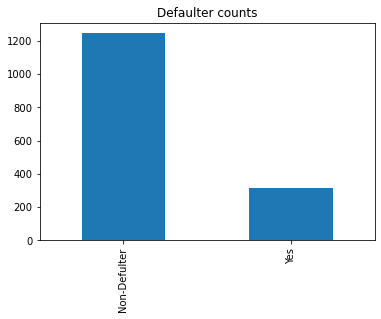

In [5]:
y_freq = df['Defaulter'].value_counts()
y_freq.plot.bar(title = 'Defaulter counts', label = True)

The classes are highly imbalanced. >400 are defaulters and >1200 are non-defaulters. It is then importantn to note here that an accuracy metric can not be reliable measure. We will hence use ROC AUC curves or specificity and sensitivity as a metric to evaluate the model performance. 

#### Correcting the column names 

In [6]:
df.columns= df.columns.str.lower()

In [7]:
# removing spaces in column names
df.columns = df.columns.str.replace(' ','')

In [8]:
df.columns

Index(['customer', 'channel', 'loantype', 'collectionpoint',
       'avgemioverduedays', 'loanterm', 'loanamount_lacs', 'typeofloantaken',
       'pi_age', 'pi_gender', 'pi_marital_status', 'pi_state', 'zone',
       'branch', 'salary', 'ageproof', 'blockedlocation-current',
       'emidefulterfrequency', 'salaryaccountinbank', 'edu_flag', 'occ_flag',
       'pi_contactablity', 'defaulter'],
      dtype='object')

#### checking how the categorical variables look 

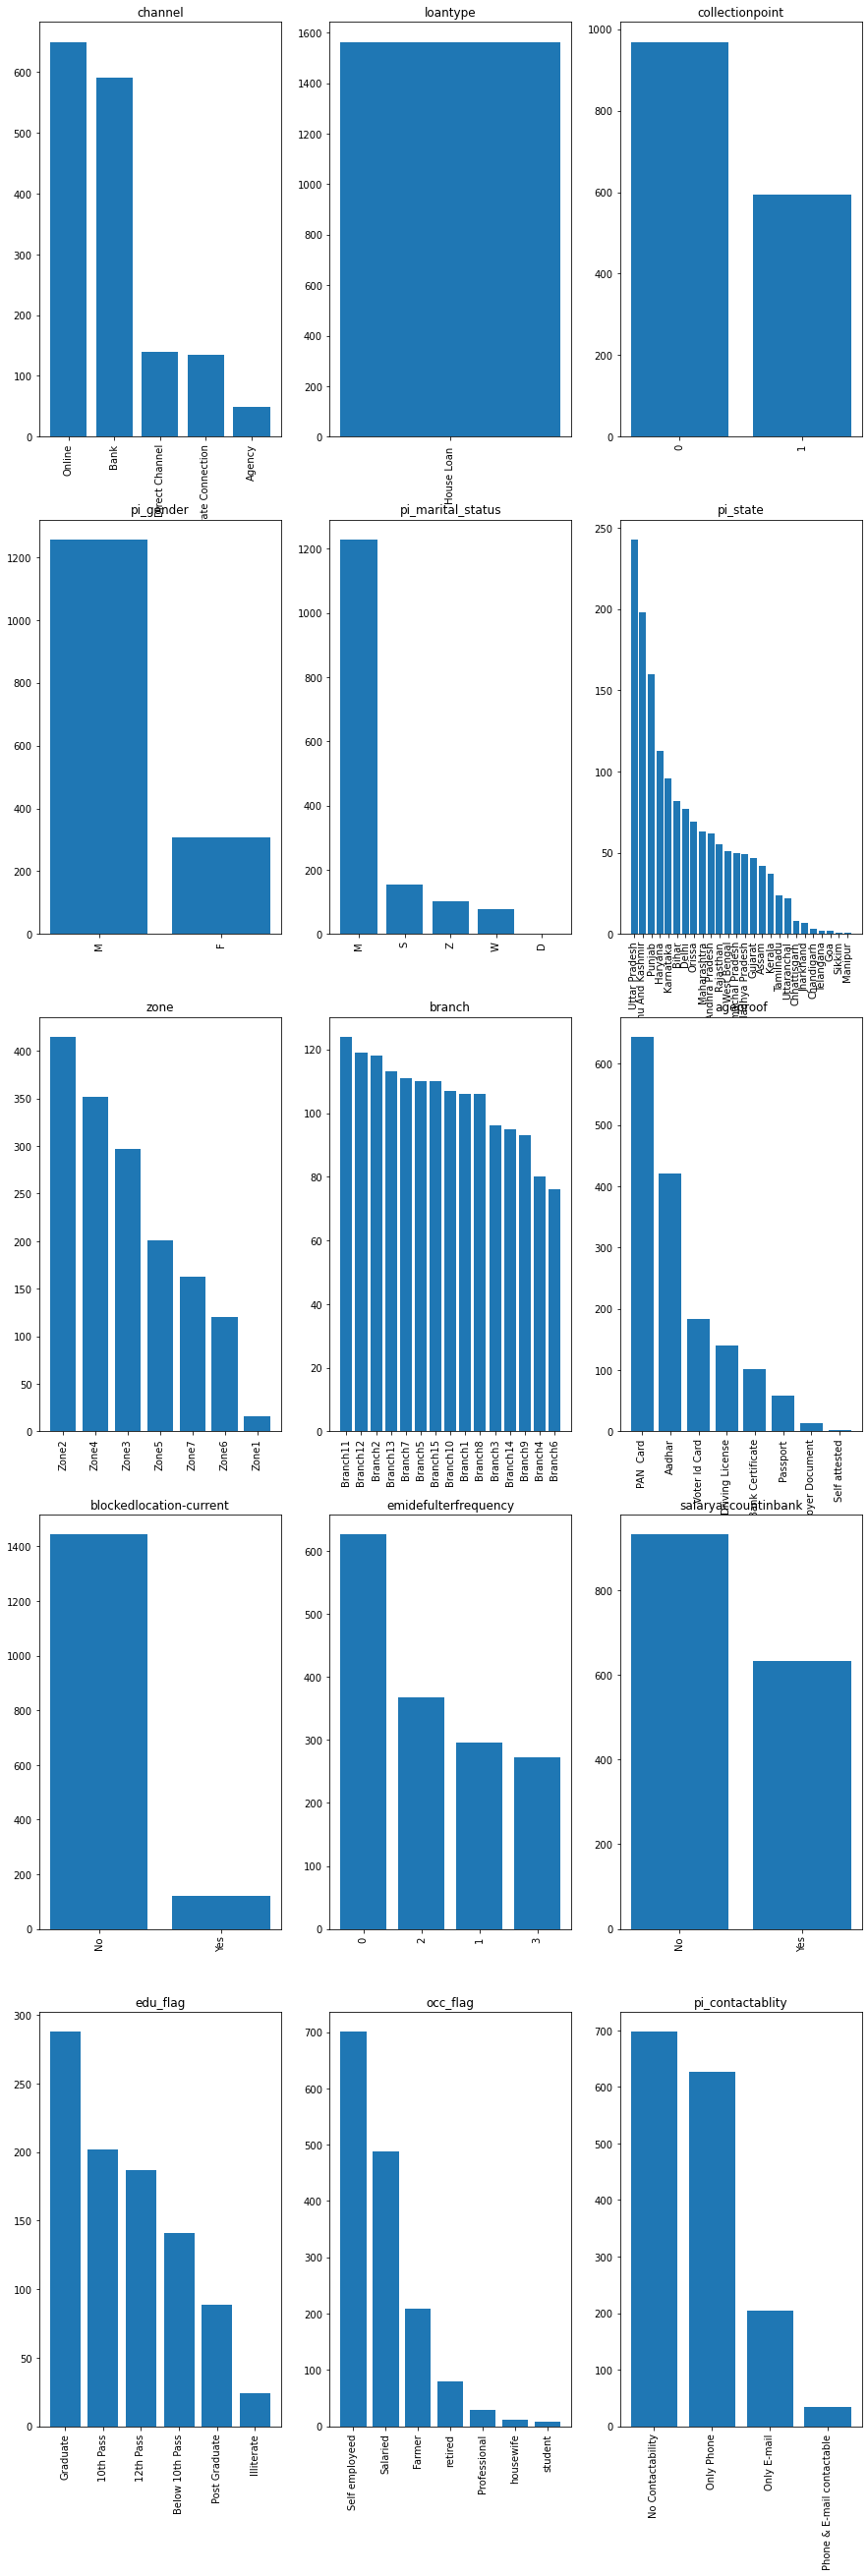

In [9]:
#making list of the categorical variables 
cat = ['channel', 'loantype', 'collectionpoint','pi_gender', 'pi_marital_status', 'pi_state', 'zone', 'branch', 'ageproof', 'blockedlocation-current',
       'emidefulterfrequency', 'salaryaccountinbank', 'edu_flag', 'occ_flag', 'pi_contactablity']
#outlining canvas
fig, axs = plt.subplots(5,3, sharex=False, sharey=False, figsize=(15, 45))

counter = 0
for i in cat:
    value_counts = df[i].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(i)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

#### Checking how the numerical variables look like 

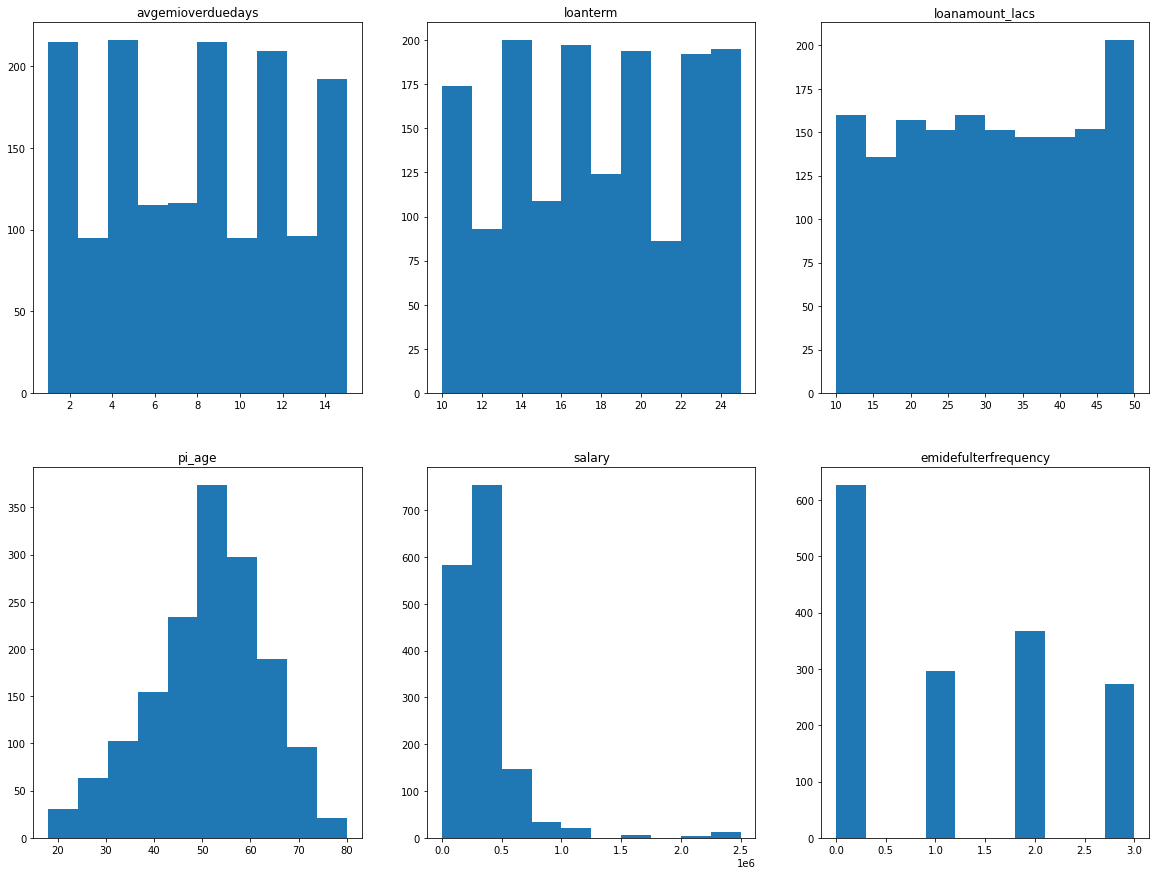

In [10]:
#making list of continuous columns
cont = ['avgemioverduedays', 'loanterm', 'loanamount_lacs','pi_age','salary','emidefulterfrequency']
#outlining canvas
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))
#assigning plots
counter = 0
for var in cont:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[var])
    
    axs[trace_x, trace_y].set_title(var)
    
    counter += 1

plt.show()

The continuous variables are mostly well-distributed except for salary, which indicates high presence of outliers

In [11]:
#analysing and checking for outliers
df['salary'].describe()

count    1.564000e+03
mean     3.272917e+05
std      2.915292e+05
min      0.000000e+00
25%      2.000000e+05
50%      2.800000e+05
75%      3.712500e+05
max      2.500000e+06
Name: salary, dtype: float64

In [12]:
#checking values less than 50k in salary
len(df[df['salary']<35000] ) / len(df) * 100

3.8363171355498724

less than 4 percent of the individuals have salaries less than the average value. This indicates the presence of outliers which need to be imputed while data cleaning. 

# Data Pre-Processing

In [13]:
#drop irrelevant columns
df = df.drop(columns = ['loantype','customer'],axis=1)

#### Converting categorical data to dummies 

In [14]:
#import LabelEncoder library 
from sklearn.preprocessing import LabelEncoder

# Assigning numerical values and storing in another column
df = df.apply(LabelEncoder().fit_transform)
df

,channel,collectionpoint,avgemioverduedays,loanterm,loanamount_lacs,typeofloantaken,pi_age,pi_gender,pi_marital_status,pi_state,...,branch,salary,ageproof,blockedlocation-current,emidefulterfrequency,salaryaccountinbank,edu_flag,occ_flag,pi_contactablity,defaulter
0,1,0,14,5,19,3,21,0,1,12,...,0,87,4,0,3,0,6,2,1,1
1,1,0,8,13,22,2,34,1,2,0,...,8,7,0,1,0,0,6,7,0,0
2,0,0,10,12,8,3,21,0,3,8,...,9,66,0,0,2,0,6,3,0,0
3,1,0,13,11,3,0,32,1,1,8,...,11,119,4,1,0,0,5,2,1,0
4,1,0,0,0,32,0,27,1,1,5,...,12,79,4,0,2,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,1,1,13,9,34,3,37,1,1,23,...,4,76,4,0,0,1,3,3,2,0
1560,4,1,4,14,8,3,37,1,1,12,...,6,7,2,0,3,0,6,2,2,1
1561,3,1,10,13,7,1,34,1,4,10,...,7,52,0,0,1,0,6,0,0,0
1562,3,1,4,4,35,1,21,1,1,13,...,8,87,4,0,1,0,3,2,1,0


#### Treating outliers in salary column

In [15]:
#imputing average and dropping original columns

def get_correct_values(row, column_name, threshold, df):
    ''' Returns mean value if value in column_name is above threshold'''
    if row[column_name] > threshold:
        return row[column_name]
    else:
        mean = df[df[column_name] <= threshold][column_name].mean()
        return mean

df['salary'] = df.apply(lambda row: get_correct_values(row, 'salary', 35000, df),axis=1)

In [16]:
df['salary'].describe()

count    1.564000e+03
mean     6.248082e+01
std      9.240010e-14
min      6.248082e+01
25%      6.248082e+01
50%      6.248082e+01
75%      6.248082e+01
max      6.248082e+01
Name: salary, dtype: float64

In [34]:
#exporting the encoded dataframe as csv
df.to_csv("C:/.../bankdefault_encoded.csv", index = False)

#### Scaling of the numerical variables

Since there are only a few continuous variables with varied values, especially salary, I have use a standard scaler (presence of outliers in some)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scaling the data 
scaled = scaler.fit_transform(df[['avgemioverduedays', 'loanterm', 'loanamount_lacs','pi_age','salary','emidefulterfrequency']])

# Train Test Split

In [19]:
#Split train-test data
from sklearn.model_selection import train_test_split

# Separating the independent variables from dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Dealing with Imbalanced Class

Since our data is highly imabalanced, we sought to use sampling methods along with SVM algo and the ROC AUC metric. The below sections describe the results of SVM for under-, over-, mixed-sampling approaches through AUC ROC curves. 

Counter({0: 9900, 1: 100})


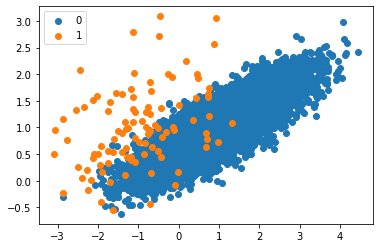

In [20]:
# Undersample imbalanced dataset with NearMiss-2
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
from numpy import where

# defining dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarising class distribution
counter = Counter(y)
print(counter)

# scatter plot by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### Baseline test with Support Vector Machine (without sampling)

In [21]:
from sklearn.svm import SVC

model=SVC()
clf = model.fit(X_train, y_train)

In [22]:
#Evaluate results 
from sklearn.metrics import classification_report, roc_auc_score, f1_score

pred = clf.predict(X_test)

print("Classification report for original (baseline) data: ", classification_report(y_test, pred))
print("ROC AUC score for (baseline) data: ", roc_auc_score(y_test, pred))

Classification report for original (baseline) data:                precision    recall  f1-score   support

           0       0.77      1.00      0.87       364
           1       0.00      0.00      0.00       106

    accuracy                           0.77       470
   macro avg       0.39      0.50      0.44       470
weighted avg       0.60      0.77      0.68       470

ROC AUC score for (baseline) data:  0.5


C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results are merely 50% 

In [23]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_train_under))

Counter({0: 882, 1: 212})
Counter({0: 212, 1: 212})


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("Classification report for undersampled data: ", classification_report(y_test, pred_under))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

Classification report for undersampled data:                precision    recall  f1-score   support

           0       0.83      0.63      0.72       364
           1       0.30      0.55      0.39       106

    accuracy                           0.61       470
   macro avg       0.57      0.59      0.55       470
weighted avg       0.71      0.61      0.64       470

ROC AUC score for undersampled data:  0.5908925979680697


In [25]:
# import random oversampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_train_SMOTE))

Counter({0: 882, 1: 212})
Counter({0: 882, 1: 882})


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("Classification report for oversampled SMOTE data: ", classification_report(y_test, pred_SMOTE))
print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))
print("ROC AUC score for (baseline) data: ", f1_score(y_test, pred_SMOTE, average='macro'))

Classification report for oversampled SMOTE data:                precision    recall  f1-score   support

           0       0.97      0.81      0.88       364
           1       0.59      0.92      0.72       106

    accuracy                           0.84       470
   macro avg       0.78      0.87      0.80       470
weighted avg       0.89      0.84      0.85       470

ROC AUC score for oversampled SMOTE data:  0.8674839311631766
ROC AUC score for (baseline) data:  0.8012532195440741


In [27]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# values to evaluate
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))

SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.932
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.925
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.923
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.927
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.933
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.936
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.934
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.935
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.935


In [28]:
# import needed libraries 
from numpy import mean
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
model = SVC()
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

ROC AUC score for the combined sampling method: 0.933


# Predicitng for the data point 

In [35]:
test = pd.read_csv("C:/.../test_bank_default.csv")

In [36]:
test.columns= test.columns.str.lower()
# removing spaces in column names
test.columns = test.columns.str.replace(' ','')

#drop irrelevant columns
test = test.drop(columns = ['loantype','customer'],axis=1)

In [37]:
fitting = model.fit(X_train, y_train)
prediction = fitting.predict(test)

In [38]:
print(prediction)

[0]


This means that the person is a non-defaulter